In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import HeatMap, output_file, show
from bokeh.models import NumeralTickFormatter
from bokeh.sampledata.autompg import autompg
from bokeh.charts import HeatMap, bins, output_file, show
from bokeh.models import HoverTool, BoxSelectTool
from bokeh import mpl
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [11]:
def extract_unique_mutations(df):
    df.mutations.fillna('', inplace=True)
    unique_mutations = set(':'.join(df.mutations.values).split(':'))
    unique_mutations.remove('')
    df['mut_number'] = df.mutations.apply(lambda x: x.count(':') + 1)
    return unique_mutations

# Barcodes distribution

In [12]:
aa = pd.DataFrame.from_csv('/Users/katya/MSc/ADS/GFP/amino_acid_genotypes_to_brightness.tsv', sep = '\t', index_col=None)
aa.columns = ['mutations', 'barcodes', 'brightness', 'std']
unique_mutations = extract_unique_mutations(aa)

In [13]:
def fitness_distribution(df):
    hist, edges = np.histogram(df.brightness, density=True, bins=41)
    p = figure(width = 700, height = 500, title = 'Fitness distribution')
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
            fill_color="#FF5656", line_color="#033649", alpha = 0.7)
    p.xaxis.axis_label = 'Fitness'
    show(p)

# Mutations distribution in the protein sequence

In [14]:
def mutations_distribution(df, unique_mutations):
    positions = [int(m[2:-1]) for m in unique_mutations if m != '']
    hist, edges = np.histogram(positions, density=False, bins=max(positions))
    p = figure(width = 900, height = 300, title = 'Mutations distribution')
    p.quad(top = hist, bottom=0, left=edges[:-1], right=edges[1:],
            fill_color="#1C7293", line_color="#033649", alpha = 0.5)
    p.xaxis.axis_label = 'Position number'
    p.yaxis.axis_label = 'Number of mutations'
    show(p)

# Aminoacid switches

In [15]:
def switch_analysis(df, unique_mutations):
    aa = list("ACDEFGHIKLMNPQRSTVWYX*")
    aa2aa = pd.DataFrame(columns = aa, index = aa).fillna(0)
    for m in unique_mutations:
        aa2aa[m[-1]].ix[m[1]] += 1
    plt.figure(figsize = [10, 8])
    sns.heatmap(aa2aa, cmap = 'YlGnBu', alpha = 0.7)
    plt.xlabel('To', fontsize = 10)
    plt.ylabel('From', fontsize = 10)
    plt.title('Frequency of aminoacid switches');

# Number of unique mutations in different types of mutants

In [16]:
def mut_distribution(df):
    uniques = []
    for i in range(max(aa.mut_number)):
        subset = aa[aa.mut_number == i]
        uniques.append(len(set(':'.join(subset.mutations.values).split(':'))))
    p = figure(width = 900, height = 500, title = 'Mutations distribution', tools = [HoverTool(),'box_zoom,box_select,crosshair,resize,reset'])
    p.line([x for x in range(max(df.mut_number))], uniques)
    p.circle([x for x in range(max(df.mut_number))], uniques)
    p.xaxis.axis_label = 'Mutant type'
    p.yaxis.axis_label = 'Number of unique mutations'
    show(p)

# Brightness distribution among singles/double/triplets, etc

In [154]:
def violin(df):
    import matplotlib.gridspec as gridspec
    fig = plt.figure(figsize = [10,10])
    ax = {}
    gs1 = gridspec.GridSpec(4, 4)
    for num in range(1, 17):
        sns.set_style("whitegrid")
        ax[num] = fig.add_subplot(gs1[num-1])
        sns.violinplot(aa.brightness[aa.mut_number == num], linewidth = .5, color = '#57D1C9', orient = 'v', ax = ax[num])
        plt.title('Number of mutations = %d' % num)
        plt.ylabel('Brightness')
        plt.ylim(0,5)
    plt.subplots_adjust(left=None, bottom=None, right=1.8, top=1, wspace=None, hspace=None)

# All plots together

In [155]:
def result(df):
    unique_mutations = extract_unique_mutations(df)
    fitness_distribution(df)
    mutations_distribution(df, unique_mutations)
    switch_analysis(df, unique_mutations)
    mut_distribution(df)
    violin(aa)

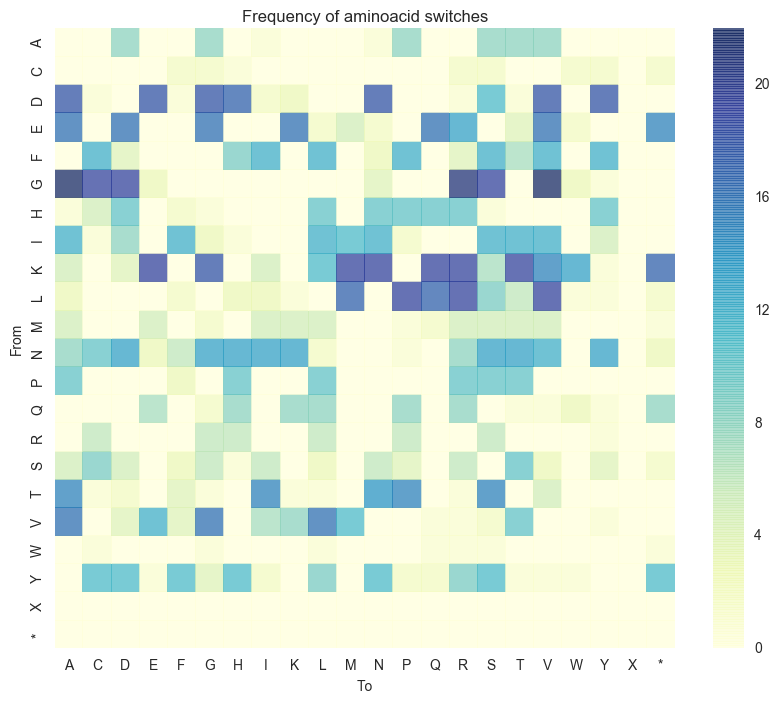

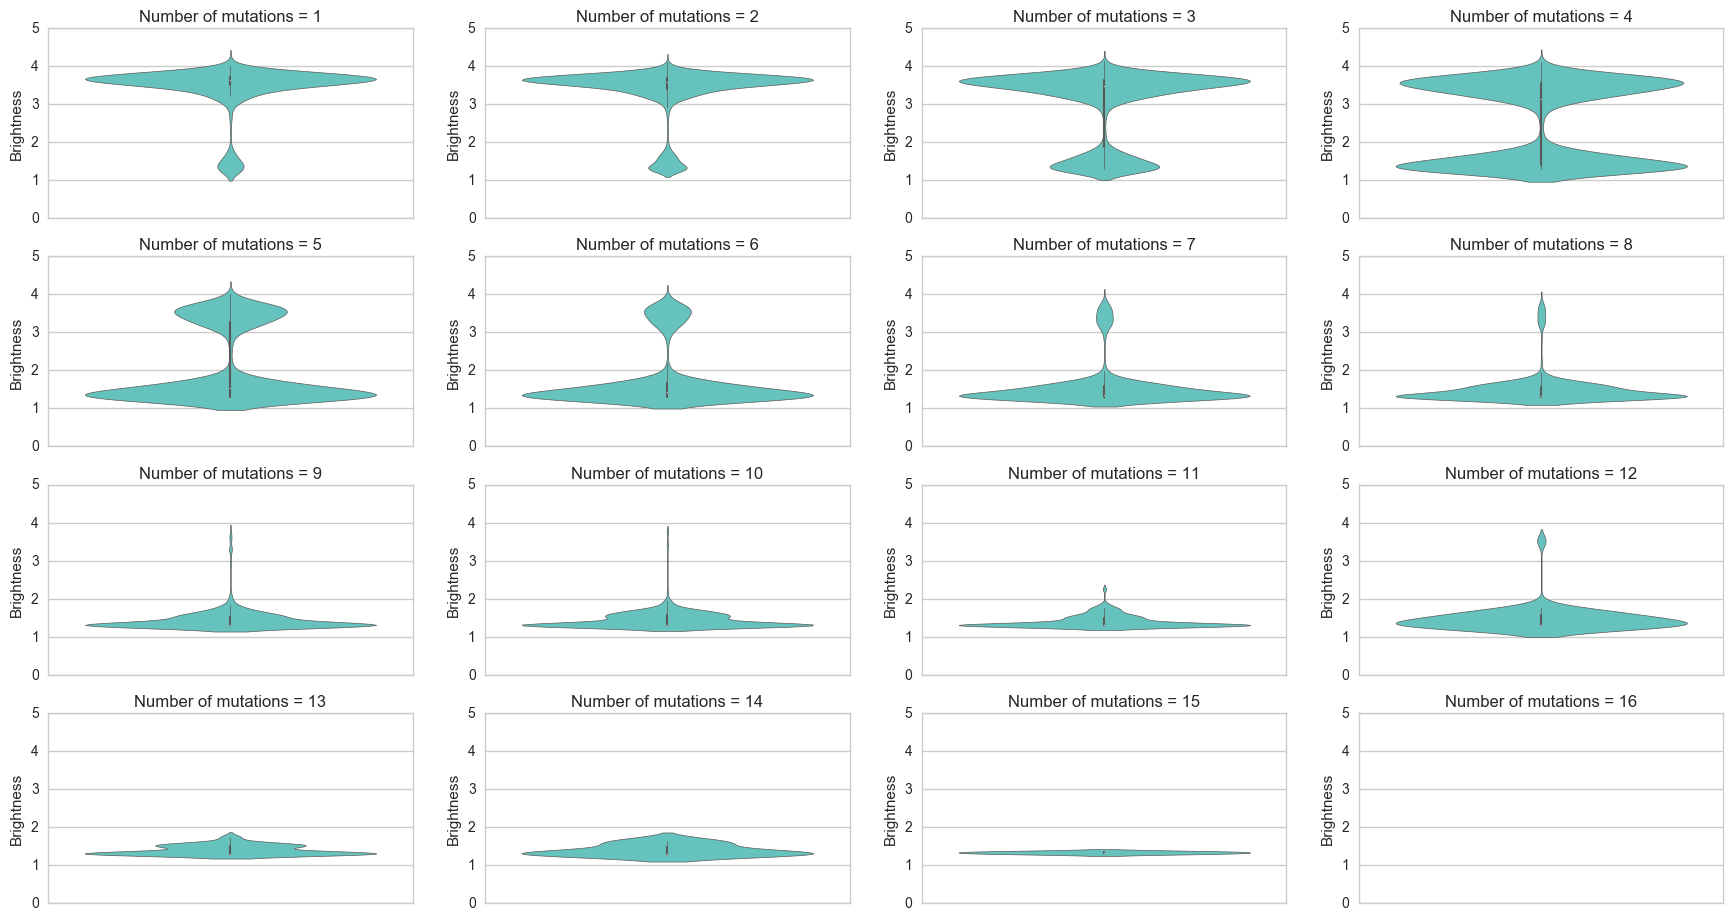

In [156]:
result(aa)